In [29]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, color
import os 
import cv2
import PIL, PIL.Image
import tensorflow as tf
from tensorflow import keras
import pathlib
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras import backend as K
import numpy as np
import matplotlib.image as mpimg
import os
import random
from icrawler.builtin import GoogleImageCrawler
from keras.layers import Input, Concatenate, Dense
from PIL import Image


In [30]:
path = 'C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\data'

In [31]:
import os
from PIL import Image

def convert_images_to_jpg(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + ".jpg")
        try:
            with Image.open(input_path) as img:
                pass
        except:
            print(f"Skipping non-image file: {input_path}")
            continue
        with Image.open(input_path) as img:
            img.convert('RGB').save(output_path, 'JPEG')

In [32]:
# input_folder = 'C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\data'
# output_folder = 'C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\PjgData'

# # Loop over subfolders within the input folder
# for subfolder in os.listdir(input_folder):
#     subfolder_path = os.path.join(input_folder, subfolder)

#     # Check if subfolder is a directory
#     if os.path.isdir(subfolder_path):
#         print(f"Converting images in subfolder: {subfolder}")
#         subfolder_output = os.path.join(output_folder, subfolder)
#         convert_images_to_jpg(subfolder_path, subfolder_output)

In [33]:
Flowers = tf.keras.preprocessing.image_dataset_from_directory('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\data')

Found 17248 files belonging to 8 classes.


In [34]:
#showing information
class_names = Flowers.class_names
print(class_names)

['Baby', 'Calimerio', 'Chrysanthemum', 'Hydrangeas', 'Lisianthus', 'Pingpong', 'Rosy', 'Tana']


In [35]:
for i in class_names:
    print(i, len(os.listdir('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\data\\'+i)))
    


Baby 2212
Calimerio 2142
Chrysanthemum 2153
Hydrangeas 2131
Lisianthus 2102
Pingpong 2162
Rosy 2233
Tana 2113


In [36]:
2212 + 2142 + 2153 + 2131+2102+2162+ 2233+ 2113

17248

In [37]:
#resize image
for i in class_names:
    for j in os.listdir('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\data\\'+i):
        img = Image.open('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\data\\'+i+'\\'+j)
        img = img.resize((180,180))
        img.save('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\data\\'+i+'\\'+j)


In [38]:
#convert to numpy array
iterator = Flowers.as_numpy_iterator()
batch = next(iterator)
print(batch[0].shape)
print(batch[1].shape)

(32, 256, 256, 3)
(32,)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2268\4164230420.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


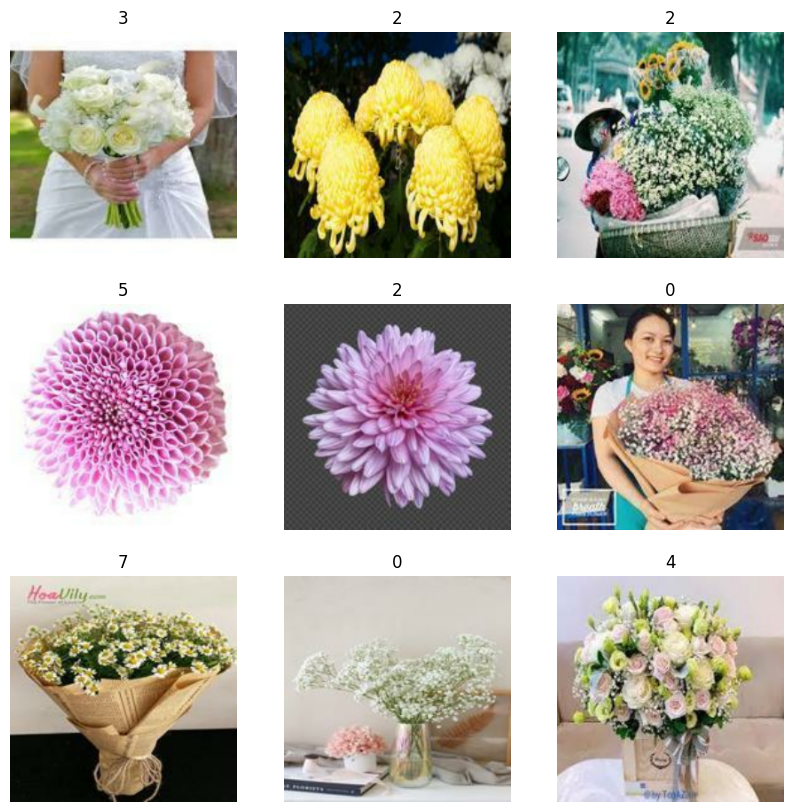

In [39]:
fix, ax = plt.subplots(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(batch[0][i].astype('uint8'))
    plt.title(batch[1][i])
    plt.axis('off')
plt.show()


In [40]:
path = 'C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\PjgData'

def remove_identical_images(folder_path):
    image_hashes = {}

    for name in os.listdir(path):
        image_path = os.path.join(path, name)
        img = PIL.Image.open(image_path)
        hash = image_hashes.average_hash(img)

        # Check if we've already seen this hash
        identical_image = image_hashes.get(hash)

        if identical_image:
            # Delete image
            os.remove(image_path)
        else:
            # Store hash
            image_hashes[hash] = name


In [41]:
#normalize images
def normalize_images(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (256, 256))
                img = img.astype(np.float32) / 255.0
                img = (img - 0.5) * 2.0  # Rescale to [-1, 1]
                cv2.imwrite(img_path, img)

normalize_images(path)


In [42]:
#remove outliers:
def remove_outliers(path, thresold = 3):
    for Dname in os.listdir(path):
        subPath = os.path.join(path, Dname)
        for file in os.listdir(subPath):
            img_path = os.path.join(subPath, file)
            img = cv2.imread(img_path)
            if img is not None:
                if img.shape[0] > thresold * img.shape[1] or img.shape[1] > thresold * img.shape[0]:
                    os.remove(img_path)
remove_outliers(path)

In [43]:
len(Flowers)

539

In [44]:
#number of images in each class
for i in class_names:
    print(i, len(os.listdir('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\PjgData\\'+i)))

Baby 2062
Calimerio 2025
Chrysanthemum 2064
Hydrangeas 2048
Lisianthus 2090
Pingpong 2022
Rosy 2002
Tana 2049


In [45]:
2062+2025+2064+2048+2090+2022+2002+2049

16362

In [46]:
#split into train and validation , test set
train_size = int (0.6 * len(Flowers))
val_size = int (0.2 * len(Flowers))
test_size = int (0.2 * len(Flowers))

train = Flowers.take(train_size)
val = Flowers.skip(train_size).take(val_size)
test = Flowers.skip(train_size + val_size).take(test_size)
print(len(train), len(test), len(val))



323 107 107


In [47]:
#set up the parameters
batch_size = 32
img_height = 256
img_width = 256
hidden_layer_dim = 128 
input_dim = img_height * img_width * 3
num_classes = 8
epochs = 30

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Dense(hidden_layer_dim),
    tf.keras.layers.Dense(hidden_layer_dim, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_dim, activation='sigmoid'),
    tf.keras.layers.Dense(num_classes)
    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               25165952  
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 25,200,008
Trainable params: 25,200,008
Non-trainable params: 0
_________________________________________________________________


In [49]:
#optimize the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               25165952  
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 25,200,008
Trainable params: 25,200,008
Non-trainable params: 0
_________________________________________________________________


In [50]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq=1)
hist = model.fit(train, validation_data=val, epochs=epochs, callbacks=[tensorboard_callback])


Epoch 1/30
323/323 [==============================] - 88s 271ms/step - loss: 2.1162 - accuracy: 0.1260 - val_loss: 2.0983 - val_accuracy: 0.1200
Epoch 2/30
323/323 [==============================] - 85s 261ms/step - loss: 2.0874 - accuracy: 0.1253 - val_loss: 2.0885 - val_accuracy: 0.1189
Epoch 3/30
323/323 [==============================] - 76s 236ms/step - loss: 2.0873 - accuracy: 0.1304 - val_loss: 2.0931 - val_accuracy: 0.1320
Epoch 4/30
323/323 [==============================] - 77s 239ms/step - loss: 2.0869 - accuracy: 0.1251 - val_loss: 2.0958 - val_accuracy: 0.1218
Epoch 5/30
323/323 [==============================] - 76s 236ms/step - loss: 2.0871 - accuracy: 0.1268 - val_loss: 2.0908 - val_accuracy: 0.1244
Epoch 6/30
323/323 [==============================] - 77s 238ms/step - loss: 2.0871 - accuracy: 0.1230 - val_loss: 2.0898 - val_accuracy: 0.1235
Epoch 7/30
323/323 [==============================] - 78s 242ms/step - loss: 2.0863 - accuracy: 0.1289 - val_loss: 2.0929 - val_ac

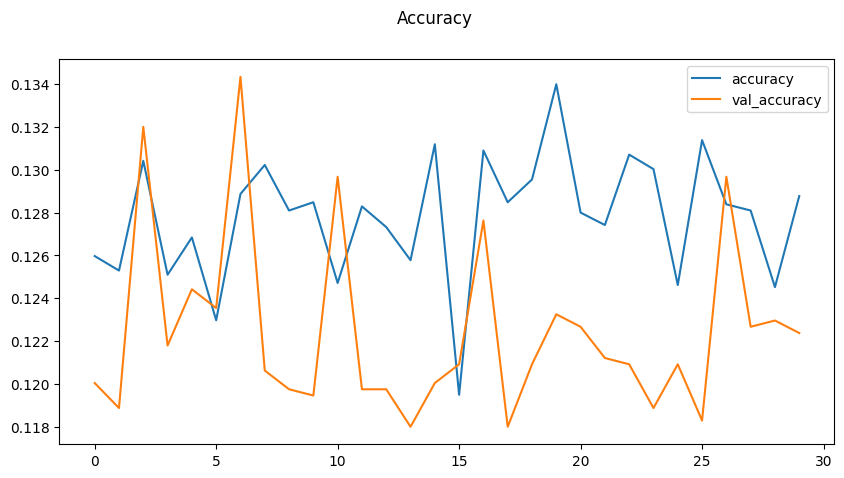

In [51]:
#accuracy between val and train
fig = plt.figure(figsize=(10,5))
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend()
plt.show()

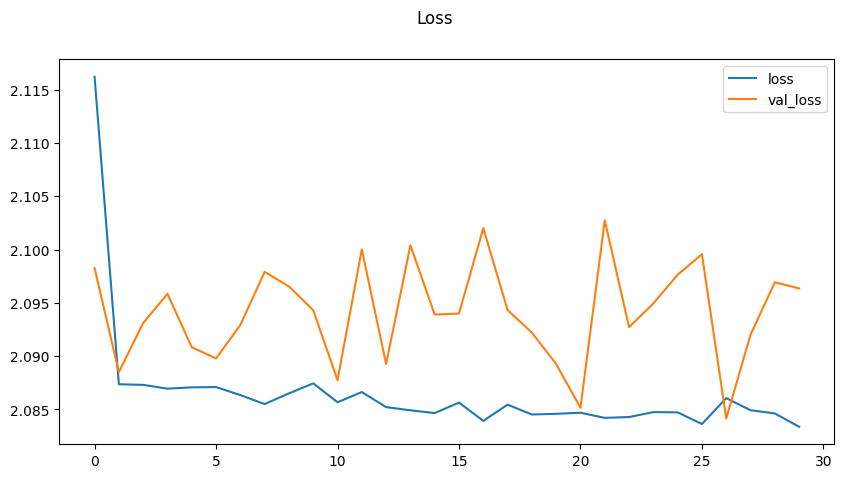

In [52]:
#lost and val_loss
fig = plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
fig.suptitle('Loss')
plt.legend()
plt.show()



In [53]:
#import module from tensorflow
from keras.metrics import BinaryAccuracy, Precision, Recall

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
from sklearn.metrics import classification_report
for batch in test.as_numpy_iterator():
    images, labels = batch
    yhat = model.predict(images)
    yhat = np.argmax(yhat, axis=1)
    
    pre.update_state(labels, yhat)
    re.update_state(labels, yhat)
    acc.update_state(labels, yhat)

1/1 [==============================] - 0s 30ms/step


In [55]:
print('Precision: ', pre.result().numpy())
print('Recall: ', re.result().numpy())
print('Accuracy: ', acc.result().numpy())

Precision:  0.8732477
Recall:  1.0
Accuracy:  0.123539716


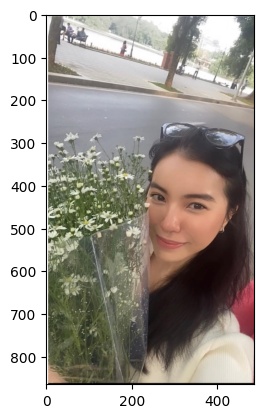

In [70]:
#predict on test 
img = cv2.imread("C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupProjectAmike\hoalacanhUpdate\Rmit2023a-cosc2753-assignment2\PUlowers.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [76]:
resize = cv2.resize(img, (256, 256))
resize = resize.astype(np.float32) / 256.0
resize = (resize - 0.5) * 2.0  # Rescale to [-1, 1]
resize = np.expand_dims(resize, axis=0)
resize.shape

(1, 256, 256, 3)

In [79]:
yhat = model.predict(resize)
yhat = np.argmax(yhat, axis=1)
print(yhat)

1/1 [==============================] - 0s 22ms/step
[2]


In [96]:
import tensorflow as tf
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from keras.models import Model
from keras.datasets import mnist
from keras.utils import to_categorical

generator_inputs = Input(shape=(100,))
x = Dense(7*7*256)(generator_inputs)
x = Reshape((7, 7, 256))(x)
x = Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', activation='relu')(x)
x = Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
x = Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='sigmoid')(x)
generator = Model(generator_inputs, x)


In [97]:
# Define the discriminator architecture
discriminator_inputs = Input(shape=(28, 28, 1))
x = Conv2D(64, (5, 5), strides=(2, 2), padding='same', activation='relu')(discriminator_inputs)
x = Conv2D(128, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
x = Flatten()(x)
x = Dense(3, activation='sigmoid')(x)
discriminator = Model(discriminator_inputs, x)


cGAN_inputs = Input(shape=(100,))
image_class = Input(shape=(10,))
generated_images = generator(cGAN_inputs)
discriminator_output = discriminator(generated_images)
cGAN = Model([cGAN_inputs, image_class], discriminator_output)



In [98]:
cGAN.compile(optimizer='adam', loss='binary_crossentropy')
cGAN.summary()


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 model_9 (Functional)           (None, 28, 28, 1)    2292737     ['input_18[0][0]']               
                                                                                                  
 input_19 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 model_10 (Functional)          (None, 3)            225411      ['model_9[0][0]']                
                                                                                           